In [1]:
from transformers import pipeline


In [4]:
classifier = pipeline("sentiment-analysis")
classifier(
    [
        "I love Statistics Canada",
        "I don't like filling out long survery!",
        "I absolutley hate filling out long survery!!!"
    ]
)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'POSITIVE', 'score': 0.9998103976249695},
 {'label': 'NEGATIVE', 'score': 0.9602669477462769},
 {'label': 'NEGATIVE', 'score': 0.9951128363609314}]

What is tokenizer: 
Like neural netwokrs, transformers can't process raw text direclty so the first step in our pipline is to convert the text inputs into numbers the model can make sense of. Tokenizer is responsible for:
- splitting the input into words, subwords or symbols (like punctuation) that are called tokens
- mapping each token to an integer
- adding additional inputs that may be useful to the model

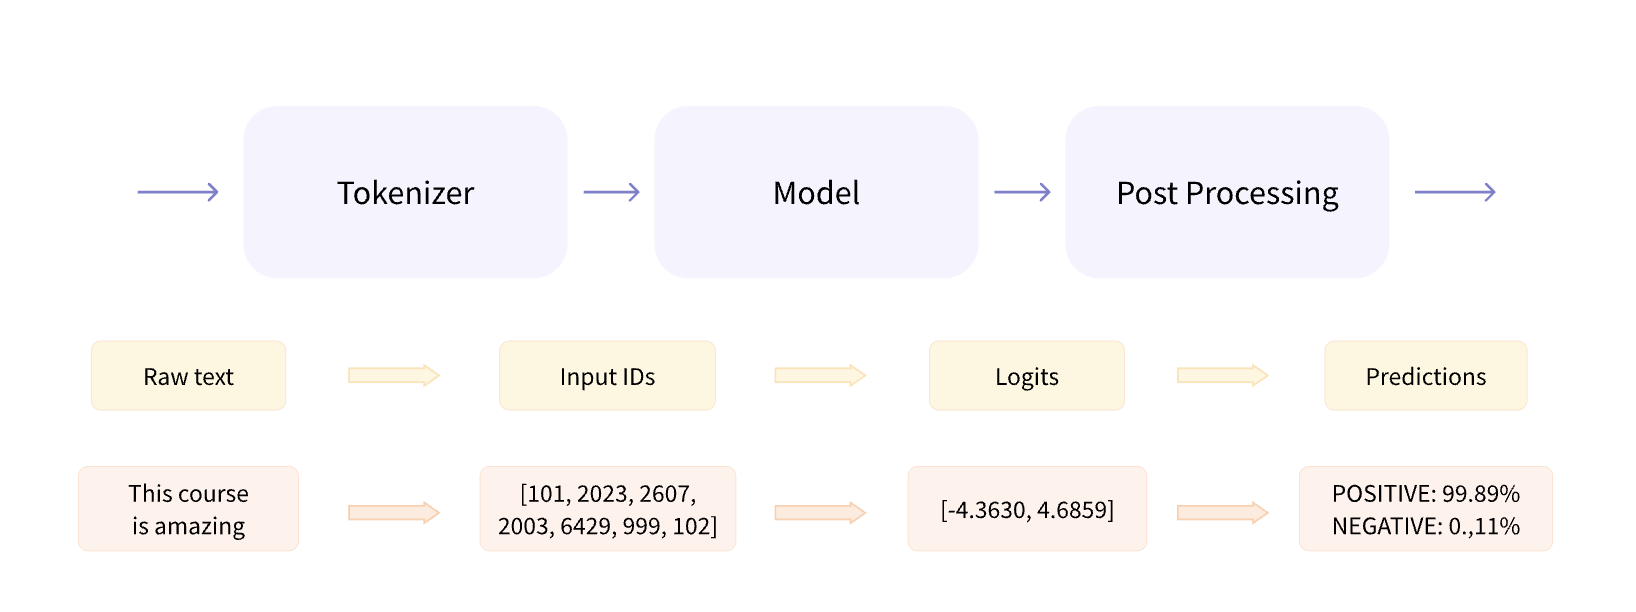


Once we have a tokenizer, we can directly pass our sentence to it and we will get back a dictionary that is ready to feed into our model. 

The next step is to convert the list of input IDs to tensors .

In [6]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

raw_inputs = [
        "I love Statistics Canada",
        "I don't like filling out long survery!",
        "I absolutley hate filling out long survery!!!"
    ]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

{'input_ids': tensor([[  101,  1045,  2293,  6747,  2710,   102,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0],
        [  101,  1045,  2123,  1005,  1056,  2066,  8110,  2041,  2146,  7505,
         27900,   999,   102,     0,     0,     0],
        [  101,  1045, 14689,  4747,  4904,  3051,  5223,  8110,  2041,  2146,
          7505, 27900,   999,   999,   999,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [7]:
from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

The output itself is a dictionary containing two keys, input_ids and attenion_mask (each row of integers is a unique identifier of the tokens in each sentence)

Now our base Transfomer module: given some inputs, it outputs what we'll call hidden states, also known as features. For each modle input, it outputs  what we'll call hidden states, also known as features. 

For each model inout, we'll retrieve a high-dimensional vector representing the contextual understanding of that input by the Transformer model. 

These hidden states are usually inputs to another part of the model, known as the head. We saw that different tasks could be performed with the same architecture, but each of these task will have a different head associated with it. 


## High-dimensional vector
The vector output by the transformer module is usually large. It is generally has three dimensions. 

- Batch size
- Sequence length
- Hidden Size: the vector dim of each model input


It is said to be “high dimensional” because of the last value. The hidden size can be very large (768 is common for smaller models, and in larger models this can reach 3072 or more).


### Model heads:
Making sense out of number

The model heads take the high-dim vector of hidden states as input and project them into different dimension. They are usually composed of one or few linear layers:

The ouput of the Transformer model is sent directly to the model head to be processed.

The embedding layer converts each input ID in the tokenized input into a vector that represents the associated token. The subsequent layers manipulate those vectors using the attention mechanism to produce the  the final representation. 

In [8]:
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

torch.Size([3, 16, 768])


In [10]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)


NameError: name 'AutoModelForSequenceClassification' is not defined